# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=fa91de13d74566e5c366d4cc6e9ba7778fb46fbcd1d5cc1b9daf2e08886fc42e
  Stored in directory: /Users/thomasgarcia/Library/Caches/pip/wheels/72/ae/63/5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city


    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | genhe
Processing Record 4 of Set 1 | brewster
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | yashkul
Processing Record 10 of Set 1 | batticaloa
Processing Record 11 of Set 1 | villamor
Processing Record 12 of Set 1 | skalistyy
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 13 of Set 1 | bambanglipuro
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | boden
Processing Record 16 of Set 1 | gi

Processing Record 14 of Set 4 | te anau
Processing Record 15 of Set 4 | xunchang
Processing Record 16 of Set 4 | panzhihua
Processing Record 17 of Set 4 | suez
Processing Record 18 of Set 4 | palabuhanratu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 19 of Set 4 | vanimo
Processing Record 20 of Set 4 | salalah
Processing Record 21 of Set 4 | luwingu
Processing Record 22 of Set 4 | bethel
Processing Record 23 of Set 4 | camocim
Processing Record 24 of Set 4 | dingle
Processing Record 25 of Set 4 | uzumlu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 26 of Set 4 | clyde river
Processing Record 27 of Set 4 | beringovskiy
Processing Record 28 of Set 4 | manchar
Processing Record 29 of Set 4 | pacifica
Processing Record 30 of Set 4 | bagdarin
Processing Record 31 of Set 4 | bhatkal
Processing Record 32 of Set 4 | puerto el triunfo
Processing Reco

Processing Record 29 of Set 7 | bereda
Processing Record 30 of Set 7 | vysokogornyy
Processing Record 31 of Set 7 | snasa
Processing Record 32 of Set 7 | shama
Processing Record 33 of Set 7 | san-pedro
Processing Record 34 of Set 7 | bengkalis
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 35 of Set 7 | salinopolis
Processing Record 36 of Set 7 | tuatapere
Processing Record 37 of Set 7 | akureyri
Processing Record 38 of Set 7 | dauriya
Processing Record 39 of Set 7 | korla
Processing Record 40 of Set 7 | akyab
Processing Record 41 of Set 7 | kleck
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 42 of Set 7 | ketchikan
Processing Record 43 of Set 7 | sioux lookout
Processing Record 44 of Set 7 | kavaratti
Processing Record 45 of Set 7 | ramhormoz
Processing Record 46 of Set 7 | baker city
Processing Record 47 of Set 7 | kambove
Processing Record 

City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 42 of Set 10 | verkhoyansk
Processing Record 43 of Set 10 | churapcha
Processing Record 44 of Set 10 | ginir
Processing Record 45 of Set 10 | beruwala
Processing Record 46 of Set 10 | strezhevoy
Processing Record 47 of Set 10 | muros
Processing Record 48 of Set 10 | broken hill
Processing Record 49 of Set 10 | ambilobe
Processing Record 0 of Set 11 | altamont
Processing Record 1 of Set 11 | nkowakowa
Processing Record 2 of Set 11 | marktoberdorf
Processing Record 3 of Set 11 | ust-nera
Processing Record 4 of Set 11 | umzimvubu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 5 of Set 11 | cidreira
Processing Record 6 of Set 11 | grand river south east
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 7 of Set 11 | terrace
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Windspeed     568
Country       568
Date          568
dtype: int64

In [18]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,qaanaaq,77.4840,-69.3632,43.38,66,81,3.89,GL,1659324369
1,genhe,50.7833,121.5167,80.76,39,33,6.26,CN,1659324370
2,brewster,41.3973,-73.6171,75.61,83,0,0.00,US,1659324371
3,yar-sale,66.8333,70.8333,56.66,61,5,8.59,RU,1659324371
4,dikson,73.5069,80.5464,41.29,94,100,9.46,RU,1659324372


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

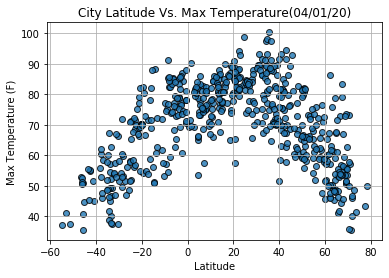

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(04/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

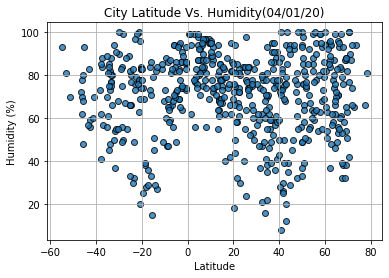

In [40]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(04/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

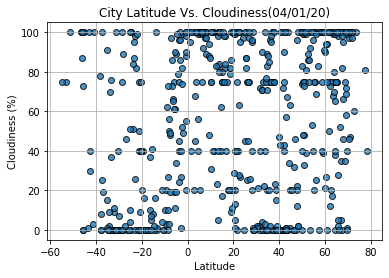

In [36]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(04/01/20)")

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

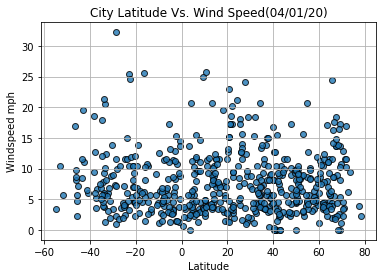

In [34]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(04/01/20)")
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [43]:
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6239032124437459


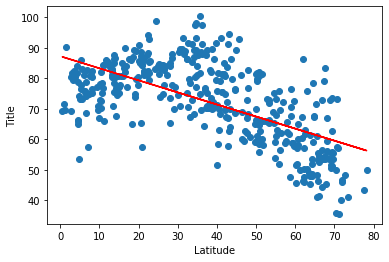

In [45]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7683240421771838


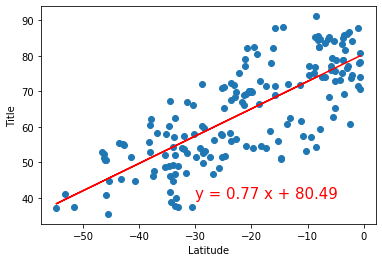

In [46]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.10962519840759864


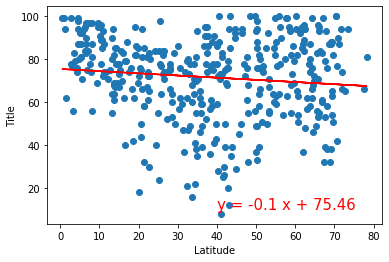

In [47]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06323759148208379


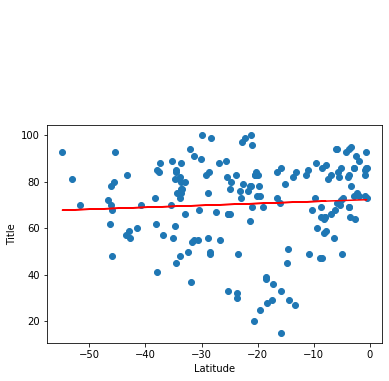

In [48]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08422146647539383


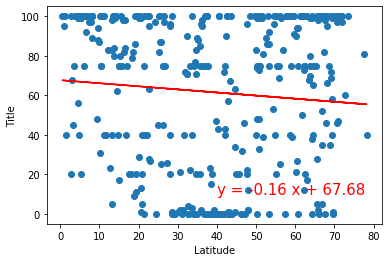

In [49]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1175428728411158


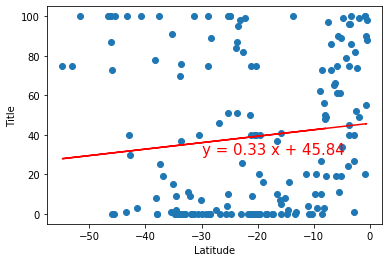

In [50]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.008656921718869608


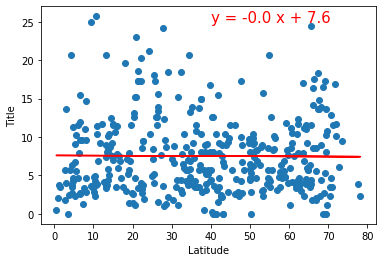

In [51]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.13345198405308803


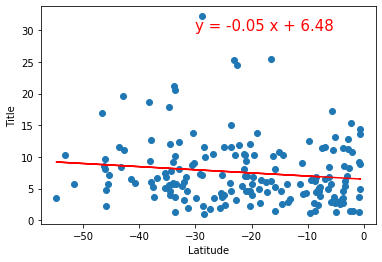

In [52]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))